In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

### Set up of visual style for plots

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Data loading

In [3]:
plots_dir = pathlib.Path("../images/EDA")
plots_dir.mkdir(exist_ok=True)

In [4]:
data_dir = pathlib.Path("../data")
measurement_file = data_dir / "transcoding_measurement.tsv"
try:
    df = pd.read_csv(measurement_file, sep='\t', quotechar='"')
    print("Data loaded succesfully")

except FileNotFoundError:
    print(f"Error: Failed to locate file: {measurement_file.absolute()}")

Data loaded succesfully


### Exploratory Data Analysis (EDA)
Performing initial dataset inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68784 non-null  object 
 1   duration     68784 non-null  float64
 2   codec        68784 non-null  object 
 3   width        68784 non-null  int64  
 4   height       68784 non-null  int64  
 5   bitrate      68784 non-null  int64  
 6   framerate    68784 non-null  float64
 7   i            68784 non-null  int64  
 8   p            68784 non-null  int64  
 9   b            68784 non-null  int64  
 10  frames       68784 non-null  int64  
 11  i_size       68784 non-null  int64  
 12  p_size       68784 non-null  int64  
 13  b_size       68784 non-null  int64  
 14  size         68784 non-null  int64  
 15  o_codec      68784 non-null  object 
 16  o_bitrate    68784 non-null  int64  
 17  o_framerate  68784 non-null  float64
 18  o_width      68784 non-null  int64  
 19  o_he

In [6]:
print(df.shape)
print(df["utime"].shape)

(68784, 22)
(68784,)


In [7]:
df.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [8]:
print("Possible input codecs:", sorted(df['codec'].unique()))
print("Possible output codecs:", sorted(df['o_codec'].unique()))

Possible input codecs: ['flv', 'h264', 'mpeg4', 'vp8']
Possible output codecs: ['flv', 'h264', 'mpeg4', 'vp8']


In [9]:
missing_values = df.isnull().sum().sum()
print(f"Missing values count in dataset: {missing_values}")

Missing values count in dataset: 0


#### Descriptive statistics and skewness
Analysis of the distribution of numerical features

In [10]:
df.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


In [11]:
stats = df.describe().T
stats['skewness'] = df.select_dtypes(include=np.number).skew()
stats

,count,mean,std,min,25%,50%,75%,max,skewness
duration,68784.0,2.864139e+02,2.872576e+02,31.080000,106.765,2.391417e+02,3.793200e+02,2.584409e+04,12.679999
width,68784.0,6.249342e+02,4.631691e+02,176.000000,320.000,4.800000e+02,6.400000e+02,1.920000e+03,1.336629
height,68784.0,4.125722e+02,2.406155e+02,144.000000,240.000,3.600000e+02,4.800000e+02,1.080000e+03,1.094027
bitrate,68784.0,6.937015e+05,1.095628e+06,8384.000000,134334.000,2.911500e+05,6.529670e+05,7.628466e+06,3.203007
framerate,68784.0,2.324132e+01,7.224848e+00,5.705752,15.000,2.502174e+01,2.900000e+01,4.800000e+01,-0.839156
i,68784.0,1.008683e+02,8.476479e+01,7.000000,39.000,8.000000e+01,1.380000e+02,5.170000e+03,5.647818
p,68784.0,6.531692e+03,6.075872e+03,175.000000,2374.000,5.515000e+03,9.155000e+03,3.049590e+05,3.958073
b,68784.0,9.147854e+00,9.251618e+01,0.000000,0.000,0.000000e+00,0.000000e+00,9.407000e+03,28.048834
frames,68784.0,6.641708e+03,6.153342e+03,192.000000,2417.000,5.628000e+03,9.232000e+03,3.101290e+05,3.966428
i_size,68784.0,2.838987e+06,4.325137e+06,11648.000000,393395.000,9.458650e+05,3.392479e+06,9.082855e+07,2.833498


### Data clean-up
* `id`: Random identifier with no predictive power
* `b_size`: Column with zero variance

In [12]:
columns_to_drop = ['id', 'b_size']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

print("Dataset shape after cleanup:", df.shape)
df.head()

Dataset shape after cleanup: (68784, 20)


,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.0,1280,720,58528,3.456


### Correlation analysis

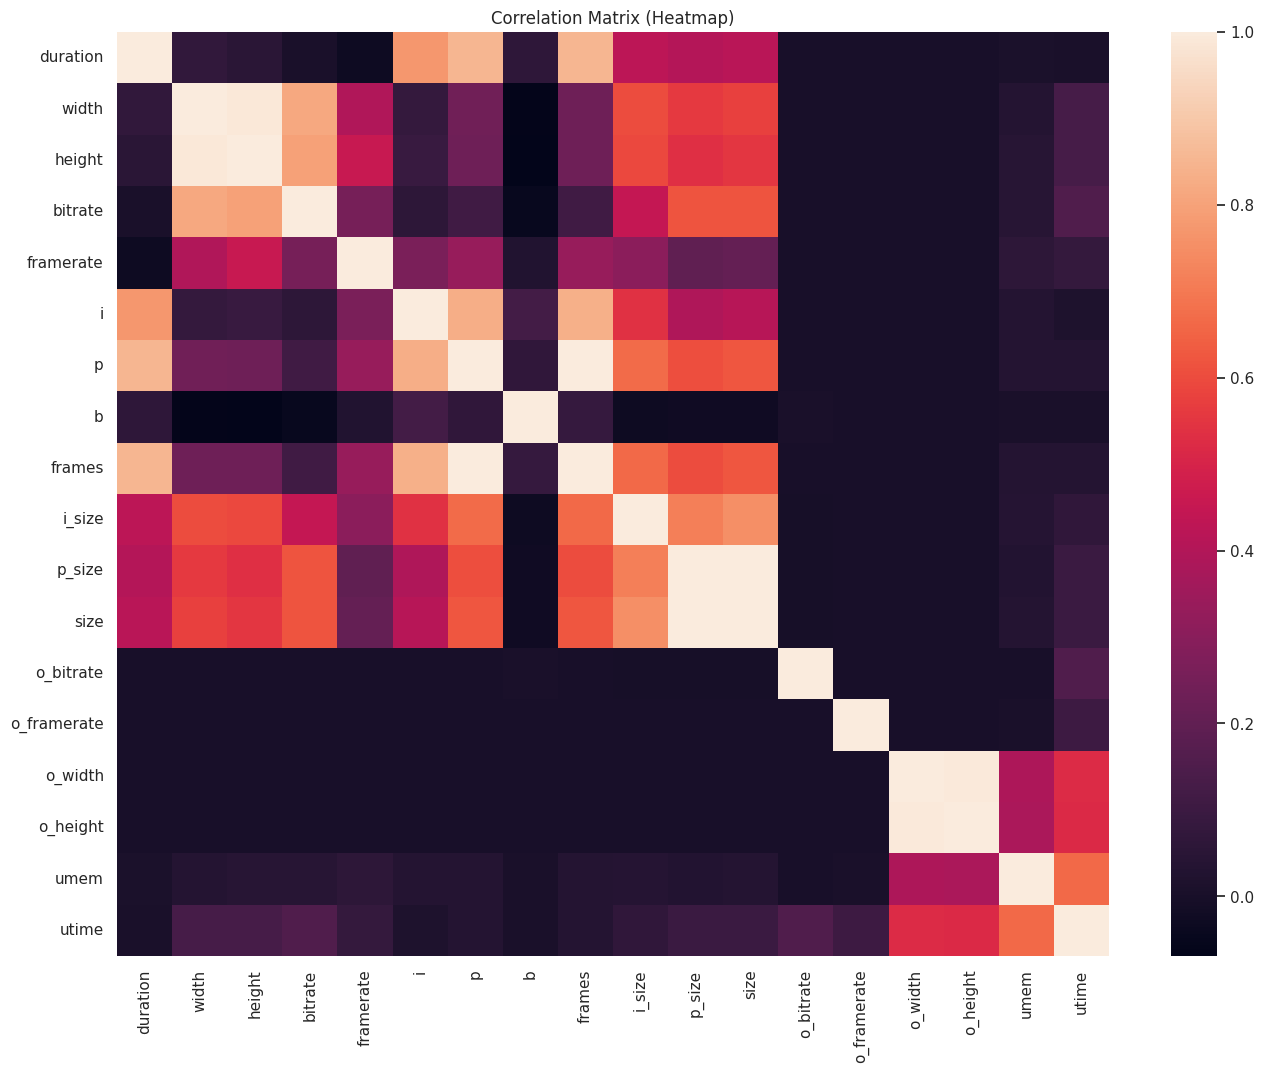

In [13]:
corr_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix (Heatmap)')

save_path = plots_dir / "correlation_matrix.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [14]:
print("Top 10 correlations with utime:")
print(corr_matrix['utime'].abs().sort_values(ascending=False).head(10))

Top 10 correlations with utime:
utime          1.000000
umem           0.663301
o_width        0.523388
o_height       0.519649
o_bitrate      0.155479
bitrate        0.155200
width          0.129861
height         0.128479
o_framerate    0.104043
p_size         0.097644
Name: utime, dtype: float64


### Categorical feature analysis (codecs)
note: logarithmic scale is used because of skewed distribution of `utime`

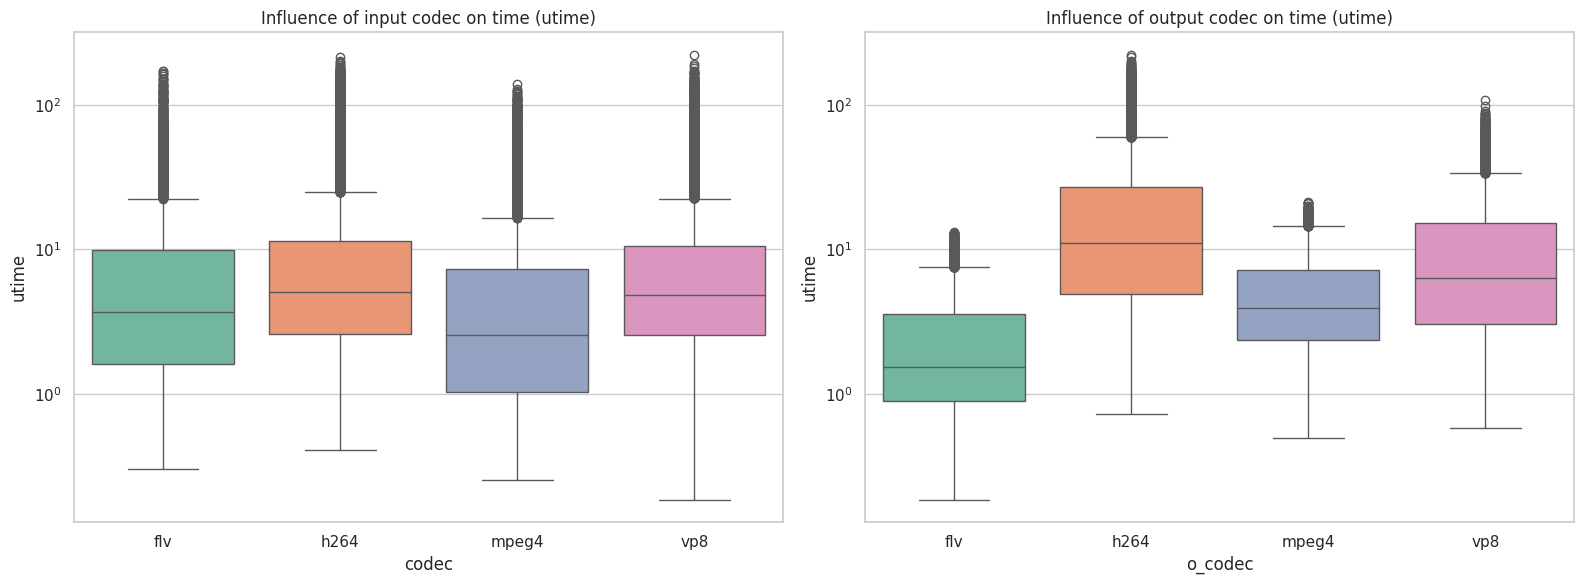

In [15]:
codecs_order = sorted(list(set(df['codec'].unique()) | set(df['o_codec'].unique())))
palette_values = sns.color_palette("Set2", n_colors=len(codecs_order))
codec_colors = dict(zip(codecs_order, palette_values))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Input codec influence over utime
sns.boxplot(ax=axes[0], x='codec', y='utime', data=df, palette=codec_colors, hue='codec', legend=False, order=codecs_order)
axes[0].set_title('Influence of input codec on time (utime)')
axes[0].set_yscale('log')

# Output codec influence over utime
sns.boxplot(ax=axes[1], x='o_codec', y='utime', data=df, palette=codec_colors, hue='o_codec', legend=False, order=codecs_order)
axes[1].set_title('Influence of output codec on time (utime)')
axes[1].set_yscale('log')

plt.tight_layout()

save_path = plots_dir / "codecs_influence.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

### Feature engineering
applying One-Hot Encoding to conver categorical variablles

In [16]:
# One-Hot Encoding for category variables
df = pd.get_dummies(df, columns=["codec", "o_codec"], drop_first=False)
df = df.astype(float)

print("Columns after encoding:")
print(df.columns)
df.head()

Columns after encoding:
Index(['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b',
       'frames', 'i_size', 'p_size', 'size', 'o_bitrate', 'o_framerate',
       'o_width', 'o_height', 'umem', 'utime', 'codec_flv', 'codec_h264',
       'codec_mpeg4', 'codec_vp8', 'o_codec_flv', 'o_codec_h264',
       'o_codec_mpeg4', 'o_codec_vp8'],
      dtype='object')


,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,22508.0,0.612,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,25164.0,0.980,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,29228.0,1.216,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,34316.0,1.692,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,58528.0,3.456,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Saving processed data

In [17]:
processed_file = data_dir / "transcoding_processed.csv"
df.to_csv(processed_file, index=False)

print(f"Saved cleaned-up data in: {processed_file.absolute()}")

Saved cleaned-up data in: /home/gdziewon/Documents/ai/projekt/notebooks/../data/transcoding_processed.csv
